In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [3]:
ap=pd.read_csv("apy.csv")
ap

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Bihar,NALANDA,1997,Rabi,Wheat,81934.00,160425.00
1,1,Assam,KARBI ANGLONG,2011,Whole Year,Onion,257.00,514.00
2,2,Gujarat,ANAND,2012,Summer,Maize,100.00,100.00
3,3,Karnataka,UTTAR KANNAD,2005,Rabi,Groundnut,2872.00,4572.00
4,4,Uttar Pradesh,JAUNPUR,2008,Rabi,Onion,110.00,1290.00
...,...,...,...,...,...,...,...,...
73822,73822,Bihar,BUXAR,2004,Whole Year,Onion,203.00,1918.00
73823,73823,Madhya Pradesh,RAJGARH,2013,Kharif,Bajra,12.00,11.00
73824,73824,Madhya Pradesh,RAJGARH,1998,Kharif,Groundnut,8700.00,9100.00
73825,73825,Rajasthan,TONK,2000,Kharif,Bajra,34477.00,20137.00


In [5]:
ap.info()
ap.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73827 entries, 0 to 73826
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     73827 non-null  int64  
 1   State_Name     73827 non-null  object 
 2   District_Name  73827 non-null  object 
 3   Crop_Year      73827 non-null  int64  
 4   Season         73827 non-null  object 
 5   Crop           73827 non-null  object 
 6   Area           73827 non-null  float64
 7   Production     72731 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


,Unnamed: 0,Crop_Year,Area,Production
count,73827.000000,73827.000000,7.382700e+04,7.273100e+04
mean,36913.000000,2005.657551,1.218297e+04,6.210320e+05
std,21312.163499,4.954910,5.348285e+04,1.749756e+07
min,0.000000,1997.000000,4.000000e-02,0.000000e+00
25%,18456.500000,2002.000000,8.100000e+01,8.900000e+01
50%,36913.000000,2006.000000,5.900000e+02,7.290000e+02
75%,55369.500000,2010.000000,4.500000e+03,7.200000e+03
max,73826.000000,2015.000000,8.580100e+06,1.125000e+09


In [6]:
ap=ap.dropna()
ap.describe()

,Unnamed: 0,Crop_Year,Area,Production
count,72731.000000,72731.000000,7.273100e+04,7.273100e+04
mean,36914.401328,2005.644196,1.234096e+04,6.210320e+05
std,21318.887413,4.961339,5.381338e+04,1.749756e+07
min,0.000000,1997.000000,2.800000e-01,0.000000e+00
25%,18443.500000,2002.000000,8.800000e+01,8.900000e+01
50%,36917.000000,2006.000000,6.070000e+02,7.290000e+02
75%,55381.500000,2010.000000,4.631500e+03,7.200000e+03
max,73826.000000,2015.000000,8.580100e+06,1.125000e+09


In [111]:
ap.isnull().sum()

Unnamed: 0       0
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [92]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ap=pd.read_csv("apy.csv")
ap.isnull().sum()
ap=ap.dropna()

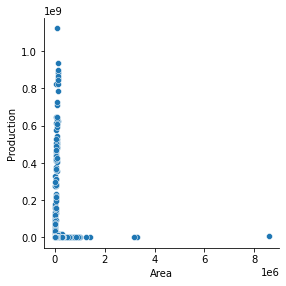

In [93]:
sns.pairplot(ap,x_vars='Area',y_vars='Production',size=4,aspect=1,kind='scatter')

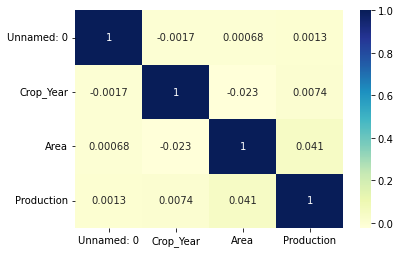

In [94]:
sns.heatmap(ap.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [95]:
X =ap['Area']
y =ap['Production']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 111)
X_train

22943    90384.0
30934      600.0
40887    15107.0
19628        2.0
20896      100.0
          ...   
38407     2467.0
29218    14864.0
25625     3519.0
4895     14595.0
10349     2229.0
Name: Area, Length: 58184, dtype: float64

In [97]:
y_train

22943    175616.0
30934       300.0
40887     51090.0
19628         1.0
20896       100.0
           ...   
38407      3894.0
29218     11480.0
25625      1569.0
4895      16058.0
10349       972.0
Name: Production, Length: 58184, dtype: float64

In [98]:
X_train_sm = sm.add_constant(X_train)

In [99]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    433264.117596
Area         12.517891
dtype: float64

In [100]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     96.08
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           1.15e-22
Time:                        16:30:05   Log-Likelihood:            -1.0516e+06
No. Observations:               58184   AIC:                         2.103e+06
Df Residuals:                   58182   BIC:                         2.103e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.333e+05   7.26e+04      5.969      0.000    2.91e+05    5.76e+05
Area          12.5179      1.277      9.802      0.000      10.015      15.021
==============================================================================
Omnibus:                   168706.224   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8103931935.368
Skew:                          40.385   Prob(JB):                         0.00
Kurtosis:                    1829.533   Cond. No.                     5.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

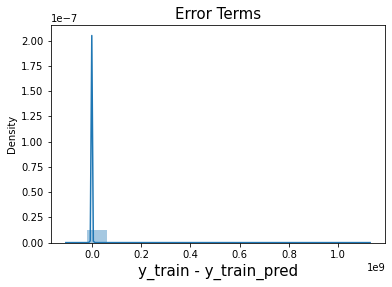

In [102]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [103]:
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

8555     463307.055130
65858    433677.207987
13878    611205.933035
4248     435529.855801
69272    437482.646741
             ...      
52318    435141.801192
13737    451202.254882
34477    923965.430661
69865    455395.748246
68253    440499.458385
Length: 14547, dtype: float64

In [105]:
import math

mse = mean_squared_error(y_test,y_test_pred)

rmse = math.sqrt(mse)

print(rmse)

18962432.767530125


In [112]:
ap

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Bihar,NALANDA,1997,Rabi,Wheat,81934.00,160425.00
1,1,Assam,KARBI ANGLONG,2011,Whole Year,Onion,257.00,514.00
2,2,Gujarat,ANAND,2012,Summer,Maize,100.00,100.00
3,3,Karnataka,UTTAR KANNAD,2005,Rabi,Groundnut,2872.00,4572.00
4,4,Uttar Pradesh,JAUNPUR,2008,Rabi,Onion,110.00,1290.00
...,...,...,...,...,...,...,...,...
73822,73822,Bihar,BUXAR,2004,Whole Year,Onion,203.00,1918.00
73823,73823,Madhya Pradesh,RAJGARH,2013,Kharif,Bajra,12.00,11.00
73824,73824,Madhya Pradesh,RAJGARH,1998,Kharif,Groundnut,8700.00,9100.00
73825,73825,Rajasthan,TONK,2000,Kharif,Bajra,34477.00,20137.00


In [117]:
ap[ap["State_Name"]=='Maharashtra'].groupby(["Crop"])['Production'].sum()

Crop
Arhar/Tur                    3588511.0
Bajra                        6666151.0
Banana                        862240.0
Castor seed                    15151.5
Cotton(lint)                23426604.0
Gram                         4553927.0
Grapes                        152147.0
Groundnut                    1938415.0
Jowar                       17912993.0
Linseed                        42612.0
Maize                        5201836.0
Mango                         195730.0
Moong(Green Gram)            1269842.0
Niger seed                     76692.0
Onion                        1473341.0
Other  Rabi pulses            148552.0
Other Cereals & Millets        42500.0
Other Kharif pulses           169240.0
Pulses total                    3173.0
Ragi                          860385.0
Rapeseed &Mustard              12999.0
Rice                        10030395.0
Safflower                     605498.0
Sesamum                       107764.0
Small millets                  76400.0
Soyabean            

In [120]:
ap.groupby(["Crop_Year"])['Production'].sum()

Crop_Year
1997    2.768054e+08
1998    5.356398e+08
1999    1.873175e+09
2000    1.964593e+09
2001    3.086705e+09
2002    2.616621e+09
2003    1.394080e+09
2004    3.896185e+09
2005    2.892020e+09
2006    3.709813e+09
2007    1.771568e+09
2008    2.088889e+09
2009    3.739178e+09
2010    2.654638e+09
2011    5.375825e+09
2012    3.876649e+09
2013    2.023688e+09
2014    1.390088e+09
2015    2.114047e+06
Name: Production, dtype: float64

In [137]:
k=ap[ap["Crop_Year"]==2005].groupby(["Crop"])['Production'].sum()
k.sort_values()

Crop
other oilseeds             1.320000e+02
Cardamom                   6.330000e+02
Sannhamp                   1.520500e+03
Oilseeds total             4.066000e+03
Other Cereals & Millets    1.771840e+04
Niger seed                 2.178100e+04
Cashewnut                  2.552022e+04
Other  Rabi pulses         3.138100e+04
Black pepper               3.699095e+04
Linseed                    4.511500e+04
Other Kharif pulses        4.870190e+04
Horse-gram                 5.050140e+04
Moth                       5.253100e+04
Peas & beans (Pulses)      6.438700e+04
Tobacco                    7.230860e+04
Small millets              9.555200e+04
Castor seed                9.884800e+04
Turmeric                   1.023300e+05
Coriander                  1.072420e+05
Safflower                  1.135730e+05
Masoor                     1.199445e+05
Khesari                    1.374330e+05
Sweet potato               1.395124e+05
Guar seed                  1.863670e+05
Mesta                      1.913420

In [138]:
ap[ap["Crop_Year"]==2015].groupby(["State_Name"])['Production'].sum()

State_Name
Odisha    2101103.1
Sikkim      12944.0
Name: Production, dtype: float64

In [139]:
ap.corr()

,Unnamed: 0,Crop_Year,Area,Production
Unnamed: 0,1.000000,-0.001718,0.000681,0.001313
Crop_Year,-0.001718,1.000000,-0.023267,0.007422
Area,0.000681,-0.023267,1.000000,0.041043
Production,0.001313,0.007422,0.041043,1.000000


In [141]:
ap[ap["State_Name"]=='West Bengal'].groupby(["Crop_Year"])['Production'].sum()

Crop_Year
1997     22472430.0
1998      9988608.3
1999      9195580.0
2000      8323849.0
2001      7689550.7
2002     12559002.1
2003     14170705.6
2004      8608367.5
2005      9494050.0
2006    173250298.0
2007    201537048.0
2008     10030521.0
2009     14476077.0
2010     12338035.0
2011     10949803.0
2012     13498244.0
2013     13494606.0
2014     18302156.0
Name: Production, dtype: float64

In [143]:
k=ap.groupby(["District_Name"])['Production'].sum()
k.sort_values()

District_Name
MUMBAI                2.000000e+00
HYDERABAD             3.060000e+02
NAMSAI                7.940000e+02
RAMGARH               8.930000e+02
RAMBAN                1.578000e+03
                          ...     
THIRUVANANTHAPURAM    2.963416e+09
KASARAGOD             3.479150e+09
THRISSUR              3.681628e+09
MALAPPURAM            4.375478e+09
KOZHIKODE             6.012791e+09
Name: Production, Length: 646, dtype: float64

In [147]:
ap[ap["Season"]=='Whole Year'].groupby(["Crop"]).count()

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Area,Production
Crop,,,,,,,
Apple,2,2,2,2,2,2,2
Arcanut (Processed),6,6,6,6,6,6,6
Arecanut,453,453,453,453,453,453,453
Arhar/Tur,70,70,70,70,70,70,70
Ash Gourd,18,18,18,18,18,18,18
...,...,...,...,...,...,...,...
Water Melon,17,17,17,17,17,17,17
Wheat,15,15,15,15,15,15,15
Yam,11,11,11,11,11,11,11


In [149]:
ap[ap["Season"]=='Kharif']['Production'].sum()

1195933096.98

In [150]:
ap[ap["Season"]=='Autumn']['Production'].sum()

19690436.78